In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import statsmodels.api as spi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import pickle

In [2]:
# Reading the csv file
data =pd.read_csv(r'C:\Users\khand\Downloads\LinearRegressionTillCloud\Linear_Regression\dataset\Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
# Checking the descriptive statistics of our data
data.describe(include='all')
# Here we have put include='all' so that we are even able to see the columns of strings datatype.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# Checking the summary of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


In [5]:
# looking at the columns of our dataframe
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
# Filling the Null values wherever required
data['GRE Score'].fillna(data['GRE Score'].mean(), inplace=True)
data['TOEFL Score'].fillna(data['TOEFL Score'].mean(), inplace=True)
data['University Rating'].fillna(data['University Rating'].mode()[0], inplace=True)

In [7]:
# Checking the no. of null vales again in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null float64
TOEFL Score          500 non-null float64
University Rating    500 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


## As the Serial No. column is of no use. So we'll remove it

In [8]:
data.drop(columns=['Serial No.'], axis=1, inplace=True)

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


## Lets visualize & analyse our data

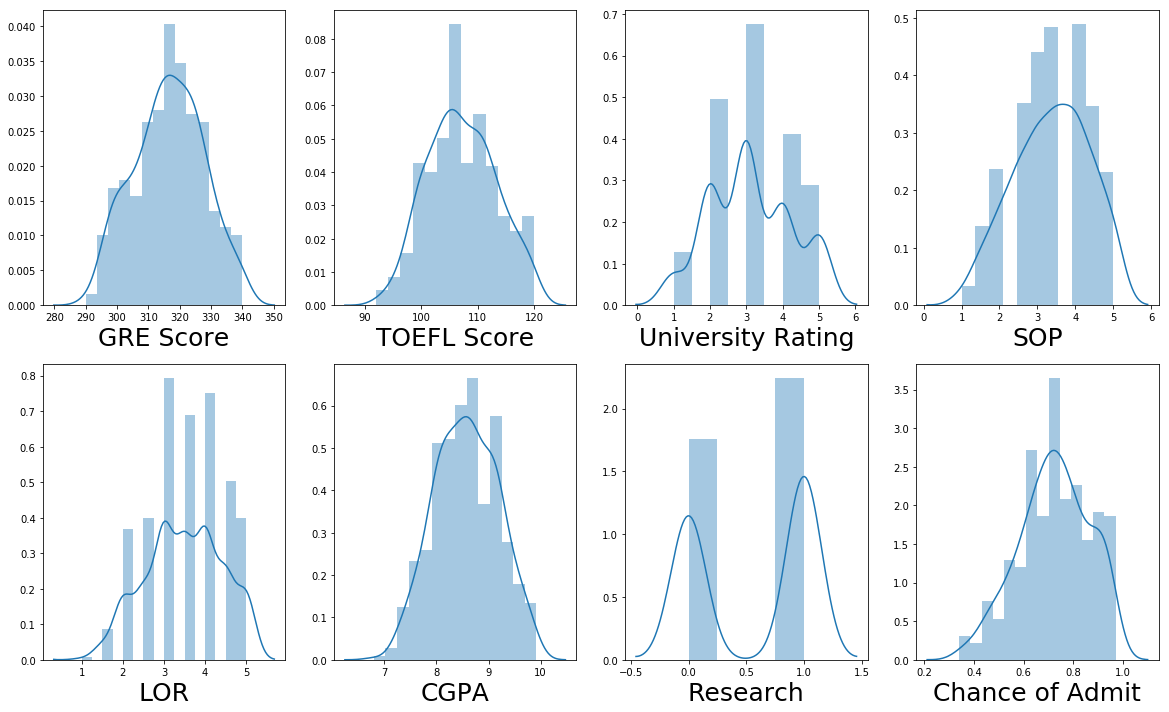

In [9]:
# Checking the distribution of every column
plt.figure(figsize=(20,25))
axis_num=1

for column in data.columns:
    ax = plt.subplot(4,4, axis_num)
    sns.distplot(data[column])
    plt.xlabel(column, size=25)
    axis_num+=1
    
plt.show()
    

In [10]:
# Dependent Variable
y = data['Chance of Admit']

# Dropping the target column from the dataframe
data.drop(['Chance of Admit'], axis=1, inplace=True)

# Independent variable
x = data.iloc[:,:]


In [11]:
print(x.shape)
print(y.shape)

(500, 7)
(500,)


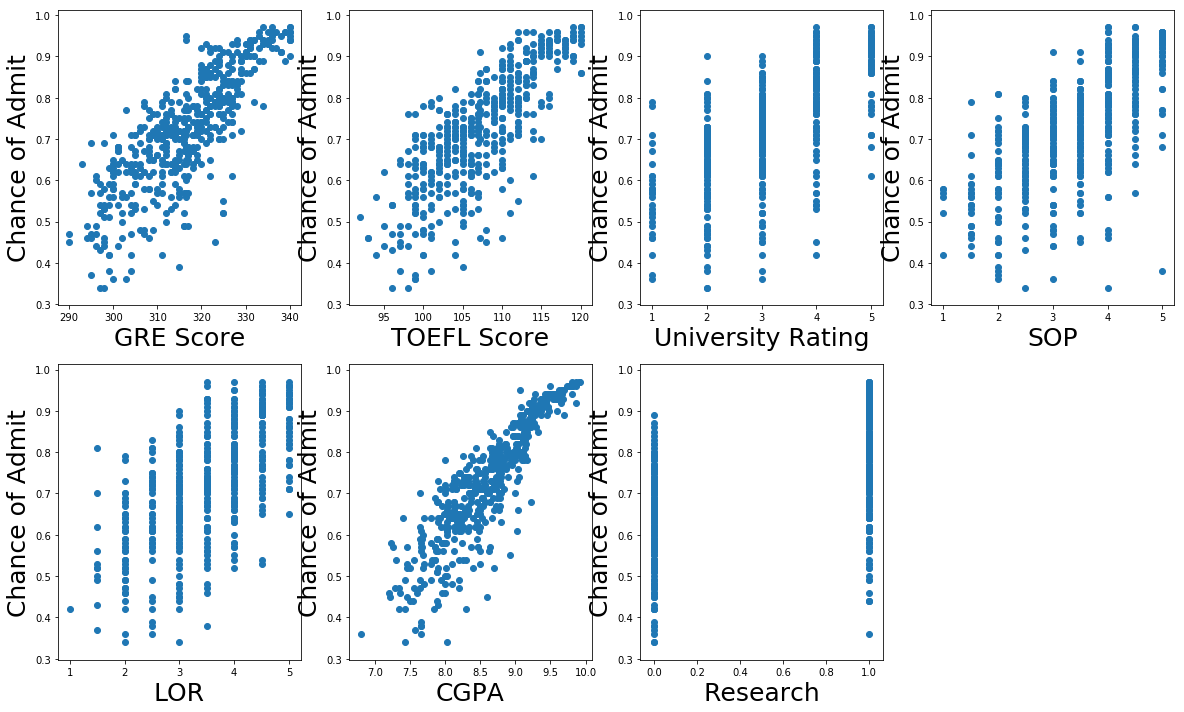

In [12]:
# Checking the relationship between dependent variable and the independent variable
plt.figure(figsize=(20,25))
axis_num=1

for column in data.columns:
    ax = plt.subplot(4,4, axis_num)
    plt.scatter(x[column], y)
    plt.xlabel(column, size=25)
    plt.ylabel('Chance of Admit',fontsize=25)
    axis_num+=1
    
plt.show()

### Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

### As we can see the data in different columns in the dataframe has huge difference among themselves. Thus, there is a need to Standardize the data

In [13]:
scaler_obj = StandardScaler()
x_scaled = scaler_obj.fit_transform(x)
# The data which we receive after standardization comes in the form of numpy ndarray

C:\Users\khand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\khand\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
# Creating a new dataFrame to store the standardized data
new_df = pd.DataFrame(x_scaled, columns=x.columns)
new_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,1.788542,0.782010,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.782010,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.104623,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.104623,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152


### Checking the multi-collinearity in our data using VIF (Variance Inflation factor)

In [15]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)

vif_df = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif_df["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif_df["Features"] = new_df.columns

In [16]:
# Checking the vif values 
vif_df

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


### As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

In [17]:
# Splitting the dataset into training and testing
train_x,test_x, train_y, test_y = train_test_split(new_df, y, test_size = 0.25,random_state=355) 

print('The size of training x is: {}'.format( train_x.shape))
print('The size of training y is: {}'.format( train_y.shape))
print('The size of testing x is: {}'.format( test_x.shape))
print('The size of testing y is: {}'.format( test_y.shape))

The size of training x is: (375, 7)
The size of training y is: (375,)
The size of testing x is: (125, 7)
The size of testing y is: (125,)


# Let's now apply Linear Regression

In [18]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# saving the model to the local file system
filename = 'D:/Projects_Vaibhav/LinearRegression_GoogleCloud_Deployment/finalized_LR_model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [21]:
# Predicting the values of the target variable of the training dataset
y_train_predicted = model.predict(train_x)

In [22]:
# Method to find adjusted r2
def adjusted_r2_score(x, yhat, r2):    
    n = x.shape[0]
    p = x.shape[1]
    adj = 1 - ((1-r2)*(n-1)/(n-p-1))
    return adj

In [23]:
# Finding r square of the training dataset
r2_train = r2_score(y_train_predicted, train_y)
r2_train

0.8116812424397223

In [24]:
# Finding the adjusted r2 of the testing dataset
adj_r2_train = adjusted_r2_score(train_x, y_train_predicted, r2_train)
adj_r2_train

0.808089331532578

In [25]:
# Predicting the values of the target variable of the test dataset
y_test_predicted = model.predict(test_x)

In [26]:
# Finding r square of the testing dataset
r2_test = r2_score(y_test_predicted, test_y)
r2_test

0.6824732716633926

In [27]:
# Finding the adjusted r2 of the testing dataset
adj_r2_test = adjusted_r2_score(test_x, y_test_predicted, r2_test)
adj_r2_test

0.6634759460364161

### So it looks like our model r2 score is less on the test data.

### Let's see if our model is overfitting our training data.

<p style="color:green; font-size:24px;"> <b>Applying Lasso Regularization</b></p>
<p style="color:blue; font-size:20px;"><b> LassoCV will return best alpha and coefficients after performing 10 cross validations</b></p>

In [28]:
lassoCV_model = LassoCV(cv =10, max_iter = 100000, normalize = True)
lassoCV_model.fit(train_x, train_y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [29]:
# So the best alpha parameter is as follows:
best_alpha_lasso = lassoCV_model.alpha_ 
best_alpha_lasso

3.0341655445178093e-05

In [30]:
# Now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(best_alpha_lasso)
lasso_reg.fit(train_x, train_y)

Lasso(alpha=3.0341655445178093e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
# Predicting the value of y for the test dataset
lasso_predicted_y_test = lasso_reg.predict(test_x)

In [32]:
# Finding the r2_score of the test dataset
lasso_r2 = r2_score(lasso_predicted_y_test, test_y)
lasso_r2

0.6822663912176898

In [33]:
# Finding the adjusted r2_score of the test dataset
lasso_adjusted_r2 = adjusted_r2_score(test_x, lasso_predicted_y_test, lasso_r2)
lasso_adjusted_r2

0.6632566881281499

## Even after applying Lasso,  r2_score comes out to be same as that of before applying regularization. Hence there is no overfitting

In [34]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 

# We will pass an array of random numbers for ridgeCV to select best alpha from them as
# it accepts array of alpha to choose the best value of alpja from

arr_of_alphas = np.random.uniform(0, 10, (50,))

RidgeCV_model = RidgeCV(alphas= arr_of_alphas, cv =10, normalize = True)
RidgeCV_model.fit(train_x, train_y)

C:\Users\khand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([9.52839, 4.83061, 0.835  , 8.71551, 0.65855, 8.57462, 8.69477,
       1.71404, 4.84555, 7.20775, 1.55783, 5.98282, 1.25774, 2.04195,
       4.57776, 8.17225, 2.62375, 2.36144, 6.83187, 3.66195, 3.26451,
       7.9205 , 2.71752, 7.30248, 5.0862 , 2.56482, 1.45887, 7.92154,
       7.8281...305, 6.74558,
       8.11492, 6.80613, 7.61954, 3.59593, 7.14602, 2.68138, 4.21485,
       5.13331]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [35]:
# So the best alpha parameter is as follows:
best_alpha_ridge = RidgeCV_model.alpha_ 
best_alpha_ridge

0.658548501752646

In [36]:
# Now that we have best parameter, let's use Ridge regression and see how well our data has fitted before

Ridge_reg = Ridge(alpha = best_alpha_ridge)
Ridge_reg.fit(train_x, train_y)

Ridge(alpha=0.658548501752646, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
# Predicting the value of y for the test dataset
ridge_predicted_y_test = Ridge_reg.predict(test_x)

In [38]:
# Finding the r2_score of the test dataset
ridge_r2 = r2_score(ridge_predicted_y_test, test_y)
ridge_r2

0.682429900186493

In [39]:
# Finding the adjusted r2_score of the test dataset
ridge_adjusted_r2 = adjusted_r2_score(test_x, ridge_predicted_y_test, ridge_r2)
ridge_adjusted_r2

0.6634299796848302

## We got the same r2_score using Ridge regression as well. So, it's safe to say there is no overfitting.

In [40]:
# Using ElasticNet
ElasticNetCV_model = ElasticNetCV(cv =10, normalize = True)
ElasticNetCV_model.fit(train_x, train_y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=True, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [41]:
# So the best alpha parameter is as follows:
best_alpha_elasticnet = ElasticNetCV_model.alpha_ 
best_alpha_elasticnet

6.068331089035619e-05

In [42]:
# l1_ration gives how close the model is to L1 regularization
l1_ratio_elasticnet = ElasticNetCV_model.l1_ratio_
l1_ratio_elasticnet

0.5

In [43]:
# Now that we have best parameter, let's use ElasticNet regression and see how well our data has fitted before

ElasticNet_reg = ElasticNet(alpha = best_alpha_elasticnet, l1_ratio= l1_ratio_elasticnet)
ElasticNet_reg.fit(train_x, train_y)

ElasticNet(alpha=6.068331089035619e-05, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [44]:
# Predicting the value of y for the test dataset
elasticNet_predicted_y_test = ElasticNet_reg.predict(test_x)

In [45]:
# Finding the r2_score of the test dataset
elasticNet_r2 = r2_score(elasticNet_predicted_y_test, test_y)
elasticNet_r2

0.682265736828968

In [46]:
# Finding the adjusted r2_score of the test dataset
elasticNet_adjusted_r2 = adjusted_r2_score(test_x, elasticNet_predicted_y_test, elasticNet_r2)
elasticNet_adjusted_r2

0.663255994587966

<b style="color:red; font-size:25px">So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.</b>

# THE END

## Steps to deploy in google cloud:
    
    Step-1: Create a python file with name main.py
    
    Step-2: Create a app.yaml file with the only content as -->    runtime: python37
            
    Step-3: Create a requirements.txt file with the following command --> pip freeze > requirements.txt
        
    Step-4: Go to https://cloud.google.com/ and create an account if already haven’t created one. Then go to the console of your account.
            
    Step-5: Go to IAM and admin(highlighted) and click manage resources
        
    Step-6: Click CREATE PROJECT to create a new project for deployment.
        
    Step-7: Once the project gets created, select App Engine and select Dashboard
        
    Step-8: Go to https://dl.google.com/dl/cloudsdk/channels/rapid/GoogleCloudSDKInstaller.exe to download the google cloud SDK to your machine.
            
    Step-9: Open cmd and move to your project folder and type     >>gcloud init      to initialise the gcloud context
        
    Step-10: It'll then ask you to login through the link provided in the cmd through an email id in the googlecloud 
        
    Step-11: After this you'll be asked to choose the project out of a list of projects.
        
    Step-12: After this type the following command     >>gcloud app deploy app.yaml --project project_name_you_have_chosen_above
        
    Step-13: After executing the above command, GCP will ask you to enter the region for your application. If you are from India select [4]
        
    Step-14: GCP will ask for the services to be deployed. Enter ‘y’ to deploy the services.

    Step-15: And then it will give you the link for your app